You need be a Mathematician
======================

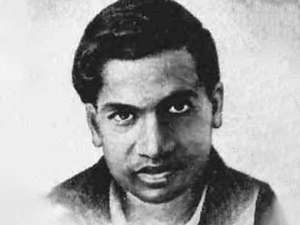


PI Fomulas
==========
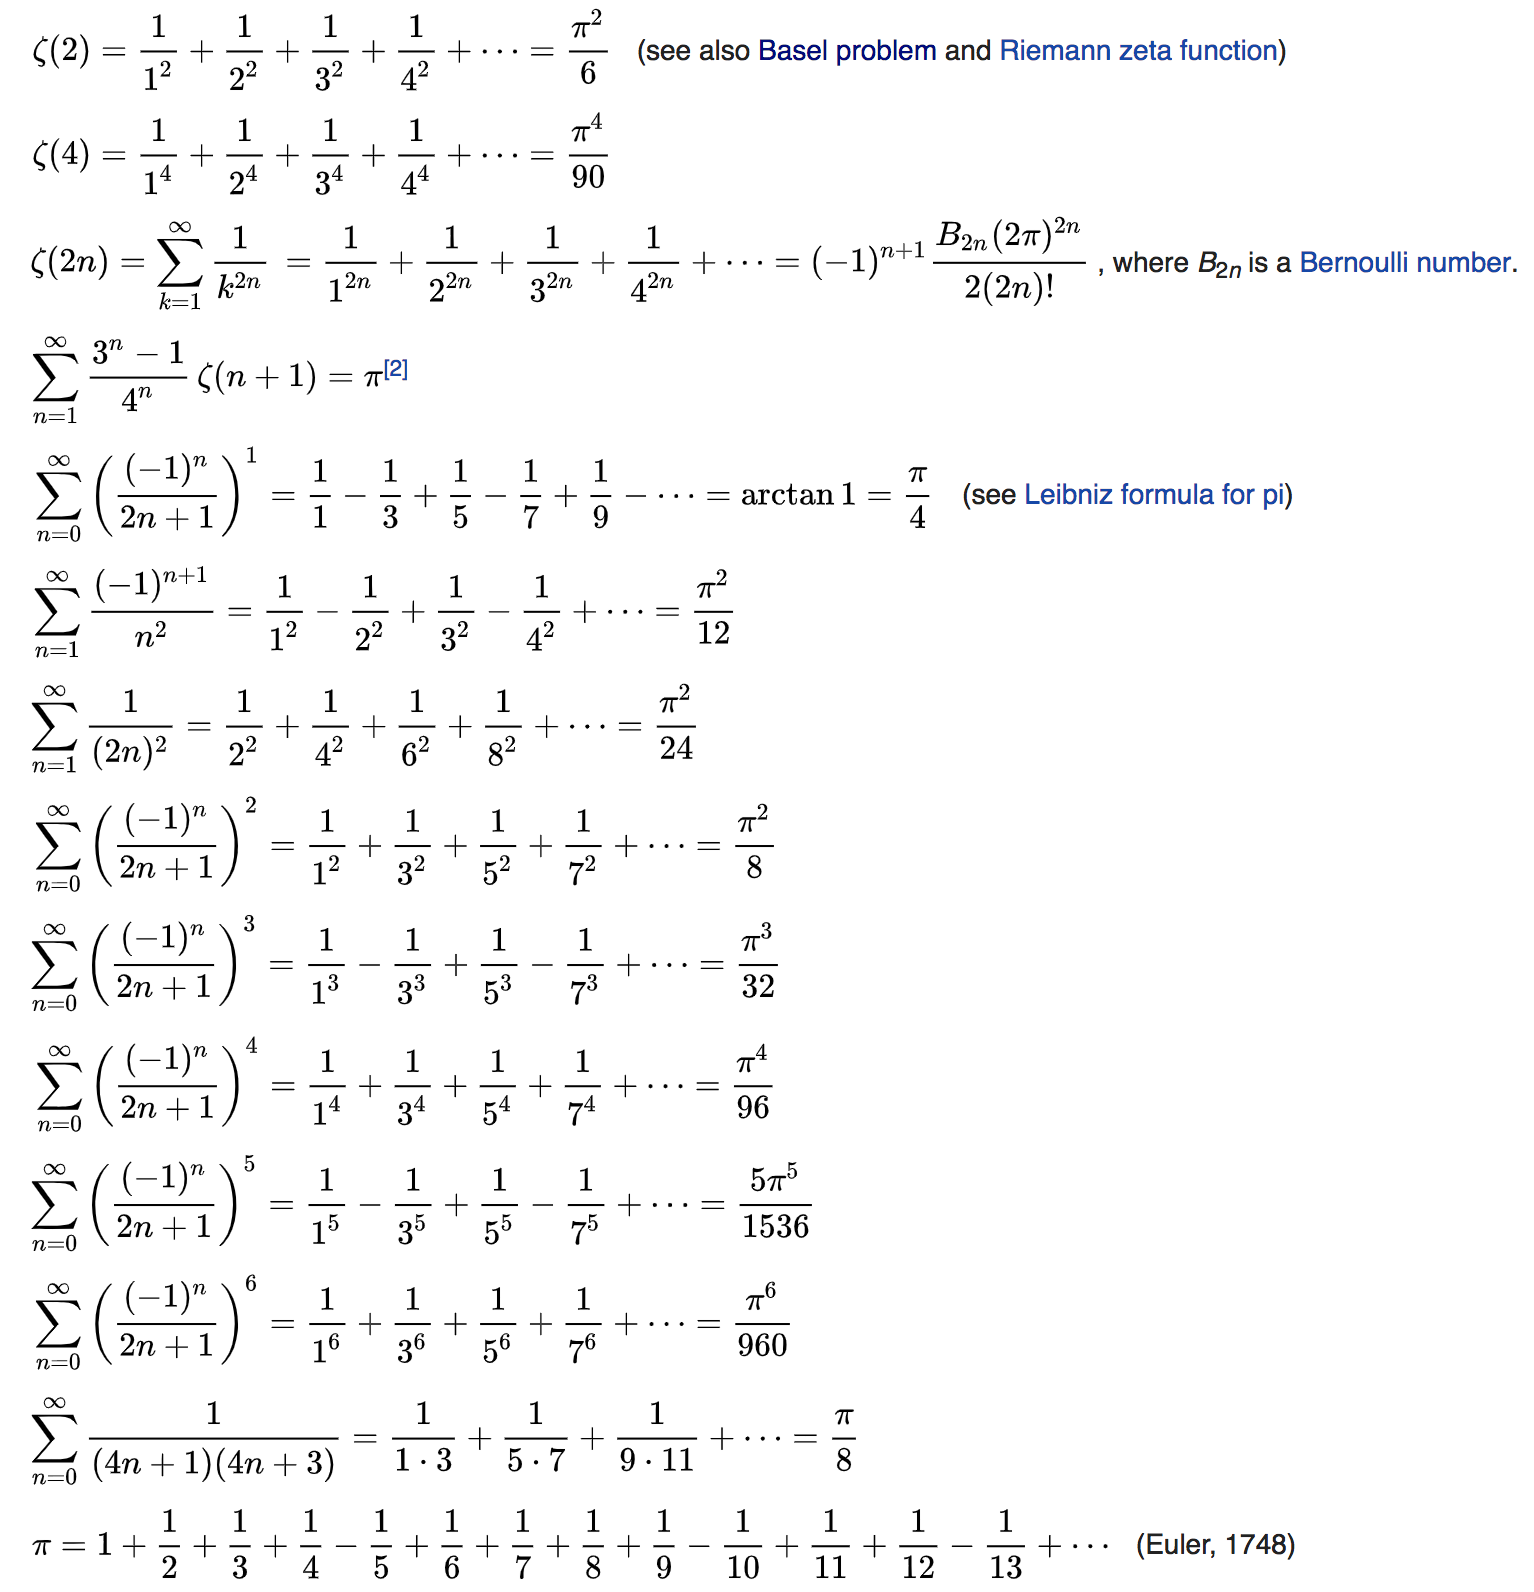


In [ ]:
import $ivy.`org.proml::proml-core:0.1.0`
import $ivy.`org.proml::proml-breeze-backend:0.1.0`
import $ivy.`com.cibo::evilplot-jupyter-scala:0.6.1-SNAPSHOT`
import $ivy.`com.cibo::evilplot-repl:0.6.1-SNAPSHOT`

import com.cibo.evilplot.displayPlot
import com.cibo.evilplot.plot.ScatterPlot
import com.cibo.evilplot.colors.{ContinuousColoring, HTMLNamedColors}
import com.cibo.evilplot.demo.DemoPlots.plotAreaSize
import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.numeric.{Point, Point3d}
import com.cibo.evilplot.plot.renderers.{PointRenderer, SurfaceRenderer}
import scala.util.Random

import com.cibo.evilplot.geometry.Drawable

    
def show(drawable: Drawable) {
    import java.io.ByteArrayOutputStream
    import javax.imageio.ImageIO
    val baos = new ByteArrayOutputStream()
    ImageIO.write(drawable.asBufferedImage, "png", baos)
    try{Image.fromArray(baos.toByteArray(), Image.PNG)}
    catch{
      case e: Exception =>  
    }
}  

def scatterPlot(points: Seq[Point3d[Double]]) = {
    val plot = ScatterPlot(
      points,
      pointRenderer = Some(PointRenderer.depthColor[Point3d[Double]](
        x => x.z,
        points.map(_.z).min,
        points.map(_.z).max,
        Some(ContinuousColoring
          .gradient3(HTMLNamedColors.green, HTMLNamedColors.yellow, HTMLNamedColors.red)),
        None
      ))
    ).standard()
      .xLabel("x")
      .yLabel("y")
      .rightLegend()
      .render(plotAreaSize)
    show(plot)
}


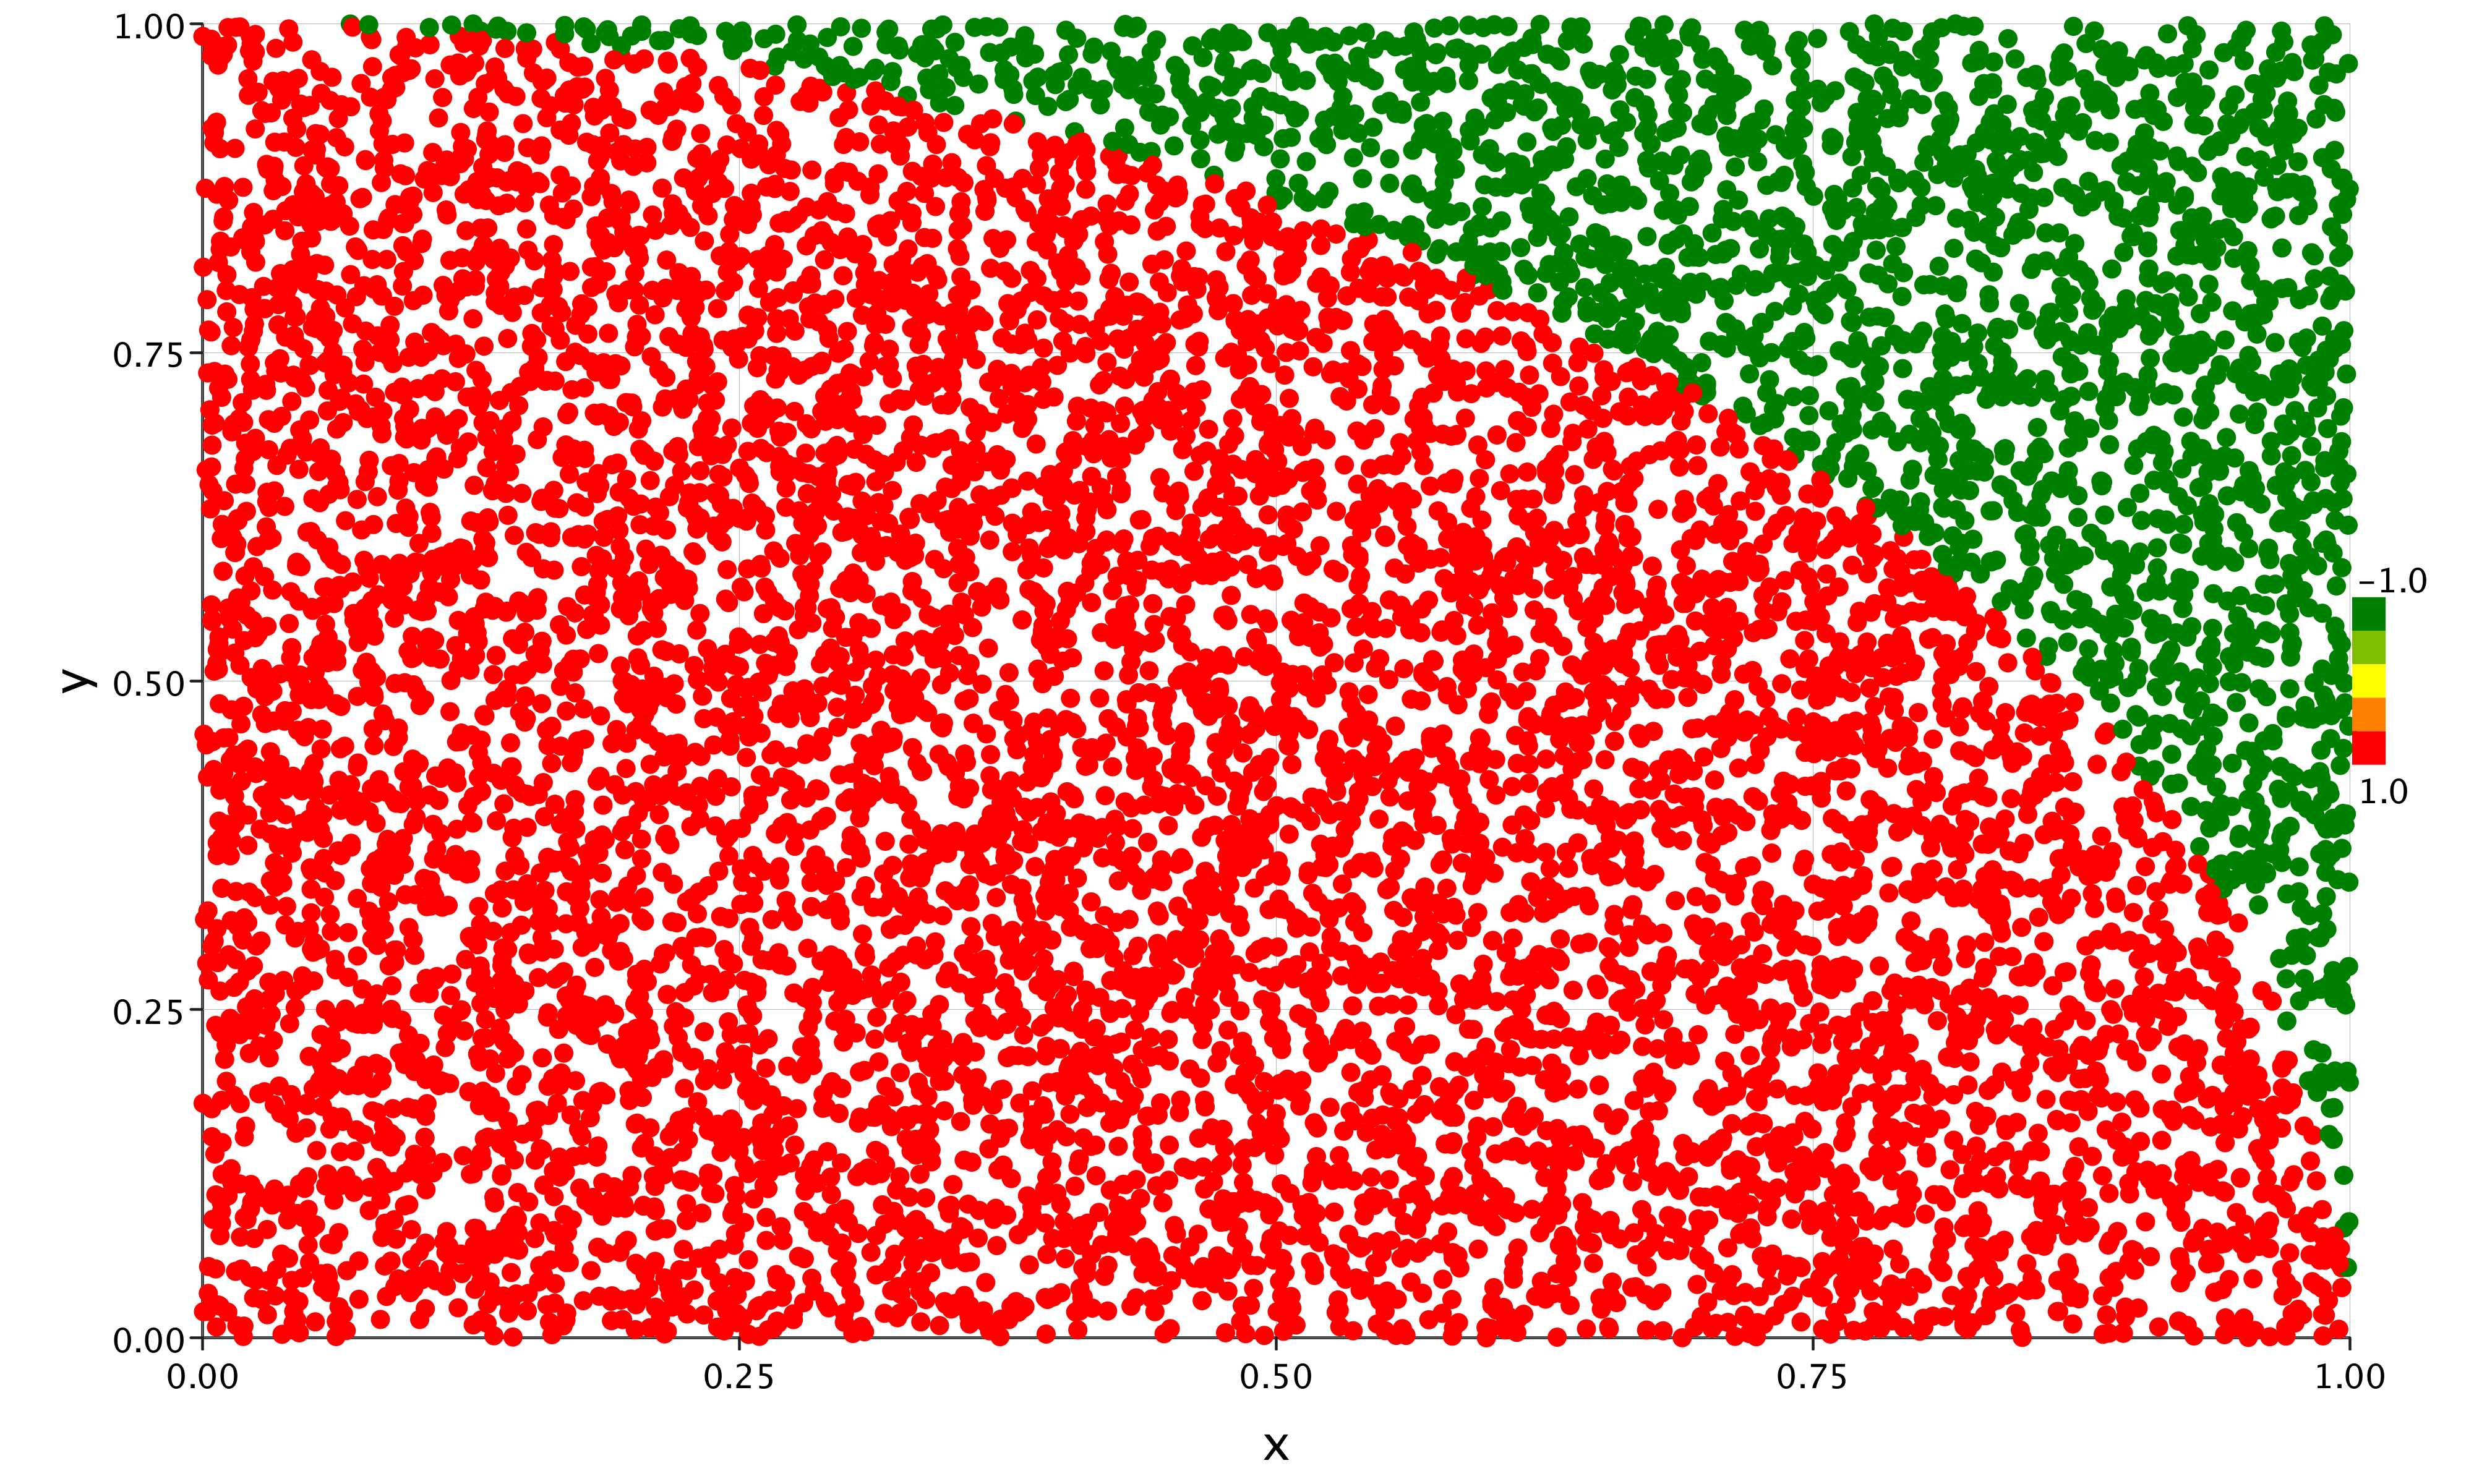

3.158


numSamples: Int = 10000
defined function inCircle
defined function data
result: Double = 3.158

In [4]:
  val numSamples                     = 10000
  def inCircle(x: Double, y: Double) = x * x + y * y < 1
  def data = Seq.fill(numSamples) {
    val x = Random.nextDouble()
    val y = Random.nextDouble()
    Point3d(x, y, if (inCircle(x, y)) 1.0 else -1.0)
  }
  scatterPlot(data)

  val result = 4.0 * data.count { p =>
    inCircle(p.x, p.y)
  } / numSamples
  println(result)